In [1]:
# Import:
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # include parent directory in the path
from toolbox.experiment import Experiment
from toolbox.SINDy import SINDy
from toolbox.symbolic_SINDy import symbolic_SINDy
from toolbox.cusum import CUSUM
from toolbox.auxiliary_functions import set_param_freq
from data import SINDy_data, equations

# Seed:
np.random.seed(999)

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [2]:
# Select ODE:
ode_name = 'TVLvODE2_d'
ode_param = "1.,-0.1,-1.5,0.075"
freq = 20
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)

# Parameters:
freq_SR = 20
n_sample = 50 
noise_ratio = 0.01
seed = 100 
n_seed = 1 
dt = 1 / freq
dim_x = 3
dim_k = 0
SW_length = 10 # SINDy sliding window length
SW_length_SR = 10 # SR sliding window length
H = 50 # length of the experiment
lazy = False # if True, we do not recompute the building blocks with SR
symbolic = True # if True, SR call is allowed, otw. simple SINDy is used throughout the whole experiment

# CUSUM parameters:
N = 10 # 10
eps = 0.1
threshold = 1.

In [ ]:
# Generate data: (16min 32.8sec)
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, 0, H)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# Save data:
file_path = 'saved/data/TVLvODE2_d_data.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
with open(file_path, 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

In [3]:
# Load data:
file_path = 'saved/data/TVLvODE2_d_data.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

In [4]:
# Initialize experiment and model discovery methods:
exp = Experiment(ode, ode_param, freq_SR, n_sample, noise_ratio, seed, n_seed, dt, dim_x, dim_k, SW_length, SW_length_SR, H, lazy, symbolic)

cusum = CUSUM(N, eps, threshold)

SINDy_method = SINDy(degree=2, include_bias=True, threshold=0.07)

SR_method = 'D-CODE' # symbolic regression method chosen 
x_id = 0  # equation to be identified by SR 
symbolic_SINDy_method = symbolic_SINDy(SR_method, x_id=0, degree=2, product=True, threshold=0.07)

t: 10
SINDy model:
(X0)' = 0.999 X0 + -0.100 X0 X1
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 0.999 1
Model complexity:  5
Lasso penalty:  3.6710840134960967
RMSE:  0.04348661496353456

t: 11
Time:  11
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.044784137953939075

t: 12
Time:  12
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.042748165128714405

t: 13
Time:  13
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.04067641381016084

t: 14
Time:  14
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.04104388451747807

t: 15
Time:  15
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.041514929535921924

t: 16
Time:  16
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.042832611323984186

t: 17
Time:  17
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.044896680433242735

t: 18
Time:  18
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.044385772186677

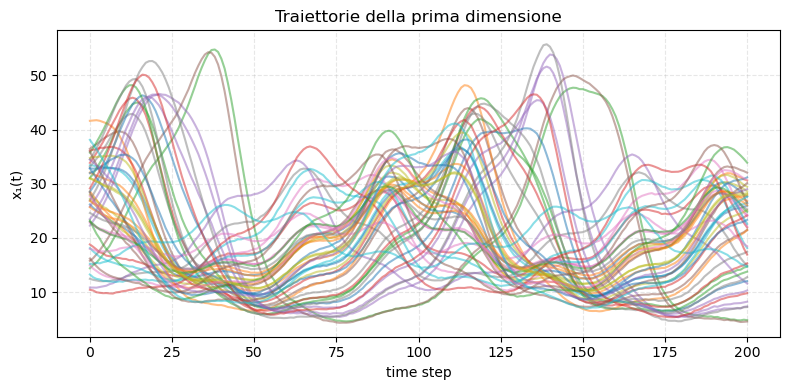

Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09      2.16576e+36       18          5606.24          6024.66      2.29m
   1     9.46      2.79876e+25       18          5600.22          6078.81      2.34m
   2     9.02      5.20722e+09       18          5519.14          6808.55      2.19m
 
promising programs:
sub(mul(add(sub(5.330, X1), X2), sin(0.450)), neg(sub(0.703, X1)))
sub(mul(add(sub(3.957, X1), X2), sin(0.450)), neg(sub(0.703, X1)))
sub(mul(add(sub(2.946, X1), X2), sin(0.450)), neg(sub(0.703, X1)))
sub(mul(add(sub(4.033, X1), X2), sin(0.450)), neg(sub(0.703, X1)))
add(sub(5.785, X1), sub(mul(add(0.414, X2), sin(0.450)), neg(sub(0.703, X1))))
add(sin(X2), sub(sub(neg(sub(2.55

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -0.204 1 + 1.012 X0 + -0.100 X0 X1 + 1.973 sin(5.006934060683674*X2) + 0.191 X2 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1000, 1000, 1.4378823233418738, 1.4378823233418738, 1.4378823233418738, 2.1486302255710696, 1.4378823233418738, 1.4378823233418738, 1000, 1.4378823233418738, 1.484508134659123, 2.684248851791474, 1.4414098774782802, 111.08493289632095, 0.48900565144631924]

Best building block:
['sin(5.006934060683674*X2)']

smart-SINDy model:
(X0)' = -0.204 1 + 1.012 X0 + -0.100 X0 X1 + 1.973 sin(5.006934060683674*X2) + 0.191 X2 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


Model complexity:  8
Lasso penalty:  6.052919195860742
RMSE:  0.4169329076558349

t: 31
Time:  31
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5116172855076647

t: 32
Time:  32
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.8488792312732508

t: 33
Time:  33
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 23 , 33 ]

Searching for the best building block:
Model:
(X0)' = -0.103 1 + 1.029 X0 + -0.102 X0 X1 + 0.268 sin(X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -0.104 1 + 1.029 X0 + -0.103 X0 X1 + 0.373 sin(sin(sin(X2)))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -0.110 1 + 1.024 X0 + -0.102 X0 X1 + 0.106 sin(X0)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -0.086 1 + 1.025 X0 + -0.102 X0 X1 + 0.377 sin(sin(X1))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -0.096 1 + 1.025 X0 + -0.102 X0 X1 + -2.638 sin(X1 + 2.0632421066628317) + 0.095 X2 sin(X1 + 2

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -0.381 1 + 1.023 X0 + -0.100 X0 X1 + 0.185 sin(5.006934060683674*X2) + 0.360 X0 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1.011849315662511, 1.04141799942188, 1.1763844669023151, 1.4246551468898607, 1.411268206675858, 7.9849071305319095, 1.2015699508749693, 1.2015699508749693, 1.011849315662511, 1.4224983348884654, 1.174616611923604, 3.863780361323677, 1.1985166985592204, 94.02774698653403, 1.2399595683568942]

Best building block:
['sin(X2)']

smart-SINDy model:
(X0)' = -0.103 1 + 1.029 X0 + -0.102 X0 X1 + 0.268 sin(X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model complexity:  7
Lasso penalty:  4.073860384047375
RMSE:  0.7103940678781403

t: 34
Time:  34
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  1.0926816219374647

t: 35
Time:  35
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 25 , 35 ]

Searching for the best building block:


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -0.382 1 + 1.025 X0 + -0.100 X0 X1 + 0.203 sin(5.006934060683674*X2) + 0.359 X0 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 0.999 1
errors:  [1000, 1000, 1.2494294567342925, 1.328421782893675, 1.186251484258441, 5.511605483787666, 1.3188625623884618, 1.3235516890557226, 1000, 1.3267806712510957, 1.2454295811292626, 1000, 1.2078122065656685, 89.38187096208445, 0.8337266537778716]

Best building block:
['sin(5.006934060683674*X2)']

smart-SINDy model:
(X0)' = -0.382 1 + 1.025 X0 + -0.100 X0 X1 + 0.203 sin(5.006934060683674*X2) + 0.359 X0 sin(5.006934060683674*X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 0.999 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


Model complexity:  8
Lasso penalty:  4.641390122610068
RMSE:  0.5074787392179355

t: 36
Time:  36
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5497245087825569

t: 37
Time:  37
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5168433692669298

t: 38
Time:  38
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5513238821241151

t: 39
Time:  39
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5985352932228303

t: 40
Time:  40
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.4862746733421927

t: 41
Time:  41
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5455263244516615

t: 42
Time:  42
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5561961759786793

t: 43
Time:  43
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.6132183308227638

t: 44
Time:  44
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.5349613009840348

t: 45
Tim

In [ ]:
# Run the experiment:

while exp.T <= exp.H:

    print(f't: {exp.T}')

    # update time-window:
    X_list_t = [x[(exp.T0*freq):(exp.T*freq)] for x in X_list]
    dX_list_t = [dx[(exp.T0*freq):(exp.T*freq)] for dx in dX_list]  

    exp.step_forward(SINDy_method, symbolic_SINDy_method, cusum, X_list_t, dX_list_t, param_list, feature_names, CP_threshold=0.8)

    # building block search time: 3m 15s
    # total time: 16m 20.3s

In [ ]:
X_lista = [np.array(x)[0:300, :] for x in X_list]
dX_lista = [np.array(dx)[0:300, :] for dx in dX_list]

import pysindy as ps
model = ps.SINDy(feature_names=feature_names, feature_library=ps.PolynomialLibrary(degree=2, include_bias=True), optimizer=ps.STLSQ(threshold=0.05))
model.fit(X_lista, t=dt, multiple_trajectories=True, x_dot=dX_lista)
print("Estimated SINDy model: ")
model.print()

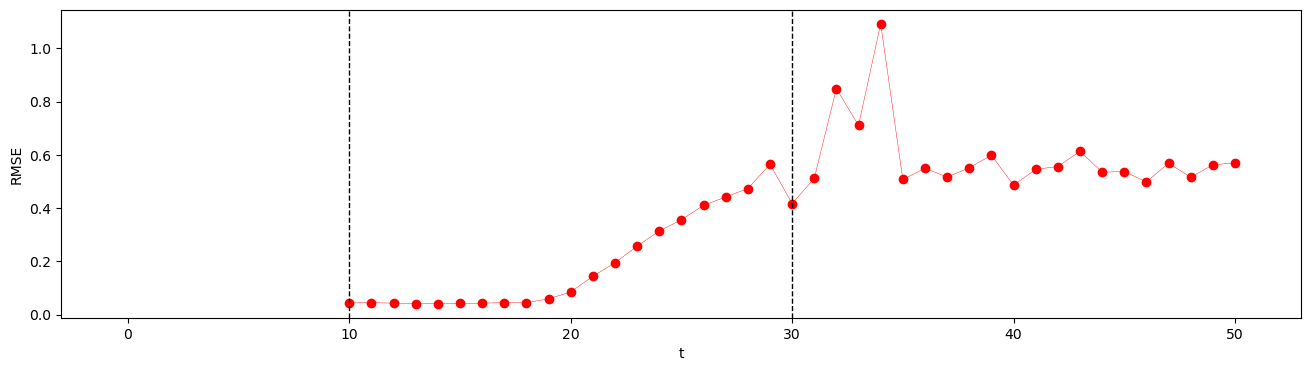

In [6]:
exp.plot_RMSE()

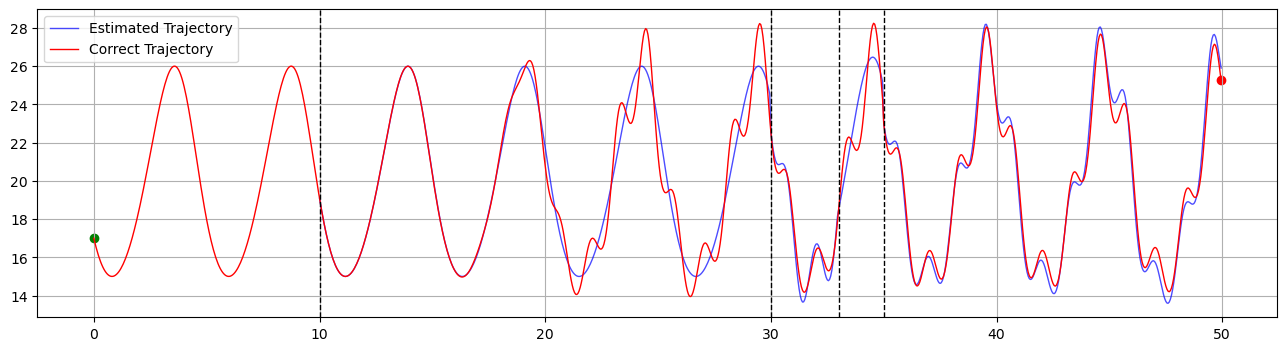

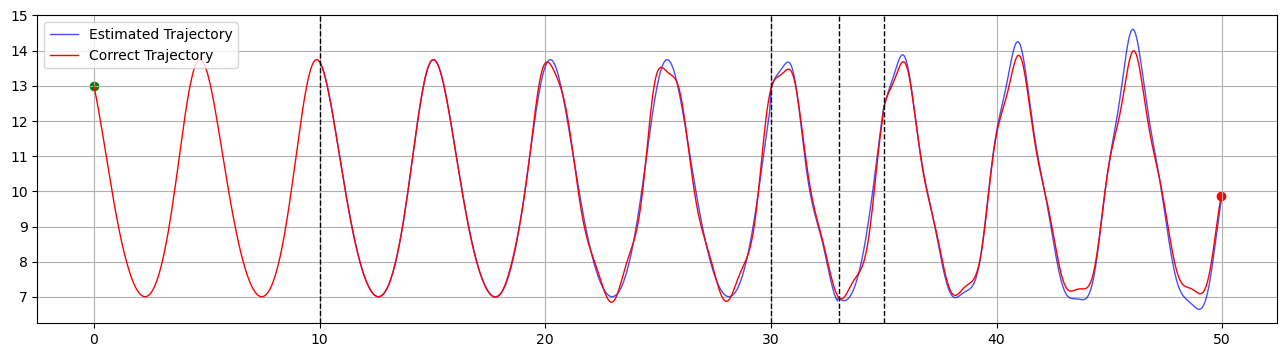

In [7]:
from data.SINDy_data import evaluate_RMSE_d, evaluate_traj_d_1D
x_id = 0

plot_times_1 = exp.turning_points.copy() 
plot_models_1 = exp.model_history.copy()
plot_times_1.append(exp.H)
plot_models_1.insert(0, plot_models_1[0])

xt_true = []
pred_list = []
time_vector_1 = np.arange(0, plot_times_1[-1], exp.dt)
time_vector_2 = np.arange(plot_times_1[1], plot_times_1[-1], exp.dt)
for i in range(len(plot_models_1)):
    xt_true_i, pred_i = evaluate_traj_d_1D(plot_models_1[i], exp.ode, 20, 1, [17, 13, 0], [17, 13, 0], plot_times_1[i], plot_times_1[i+1], x_id, exp.dim_x, exp.dim_k, plot=False)
    if i == 0:
        xt_true = np.concatenate((xt_true, xt_true_i), axis = 0)
    else: 
        xt_true = np.concatenate((xt_true, xt_true_i), axis = 0)
        pred_list = np.concatenate((pred_list, pred_i), axis = 0)


fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax.plot(time_vector_2, pred_list, color='blue', linewidth=1.0, alpha=0.7, label='Estimated Trajectory')
ax.plot(time_vector_1, xt_true, color='red', linewidth=1.0, label='Correct Trajectory')
ax.scatter(time_vector_1[-1], xt_true[-1], color='red')
ax.scatter(time_vector_1[0], xt_true[0], color='green')
ax.legend()
ax.grid()
for x in [plot_times_1[1], plot_times_1[2], plot_times_1[3], plot_times_1[4]]: 
    ax.axvline(x=x, color='black', linestyle='--', linewidth=1.0, label='Vertical Line' if x == 1 else "")



x_id = 1

plot_times_1 = exp.turning_points.copy() 
plot_models_1 = exp.model_history.copy()
plot_times_1.append(exp.H)
plot_models_1.insert(0, plot_models_1[0])

xt_true = []
pred_list = []
time_vector_1 = np.arange(0, plot_times_1[-1], exp.dt)
time_vector_2 = np.arange(plot_times_1[1], plot_times_1[-1], exp.dt)
for i in range(len(plot_models_1)):
    xt_true_i, pred_i = evaluate_traj_d_1D(plot_models_1[i], exp.ode, 20, 1, [17, 13, 0], [17, 13, 0], plot_times_1[i], plot_times_1[i+1], x_id, exp.dim_x, exp.dim_k, plot=False)
    if i == 0:
        xt_true = np.concatenate((xt_true, xt_true_i), axis = 0)
    else: 
        xt_true = np.concatenate((xt_true, xt_true_i), axis = 0)
        pred_list = np.concatenate((pred_list, pred_i), axis = 0)


fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax.plot(time_vector_2, pred_list, color='blue', linewidth=1.0, alpha=0.7, label='Estimated Trajectory')
ax.plot(time_vector_1, xt_true, color='red', linewidth=1.0, label='Correct Trajectory')
ax.scatter(time_vector_1[-1], xt_true[-1], color='red')
ax.scatter(time_vector_1[0], xt_true[0], color='green')
ax.legend()
ax.grid()
for x in [plot_times_1[1], plot_times_1[2], plot_times_1[3], plot_times_1[4]]:  
    ax.axvline(x=x, color='black', linestyle='--', linewidth=1.0, label='Vertical Line' if x == 1 else "")

In [ ]:
T0 = 35
T = 45

X_lista = [np.array(x)[T0*freq:T*freq, :] for x in X_list]
dX_lista = [np.array(dx)[T0*freq:T*freq, :] for dx in dX_list]

model = symbolic_SINDy(SR_method='D-CODE', 
                       x_id=0,
                       degree=2,
                       threshold=0.07,
                       penalty=20,
                       product=True)

model, building_blocks_lambda, _, _, _, _ =  model.call(X_list=X_lista, dX_list=dX_lista, param_list=param_list,
           feature_names=feature_names, dt=dt, building_blocks_lambda=None, 
           function_names=None, patience=0, lazy=True, ode=ode, ode_name=ode_name,
           ode_param=ode_param, freq_SR=freq_SR, n_sample=n_sample, 
           noise_ratio=noise_ratio, seed=seed, n_seed=n_seed, 
           T0=T0, T=T, dim_x=dim_x, dim_k=dim_k)

In [9]:
file_path = 'saved/exp/TVLvODE2_d_50.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
with open(file_path, 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

In [ ]:
# Load data:
file_path = 'saved/exp/TVLvODE2_d_50.pkl'
with open(file_path, 'rb') as f:
    exp = dill.load(f)

t: 51
Time:  51
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.47966601932662656

t: 52
Time:  52
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
RMSE:  0.6794462331275188

t: 53
Time:  53
CUSUM quantity:  0.030978638070830428
CUSUM quantity:  0
Change point: False
RMSE:  0.7182055930985967

t: 54
Time:  54
CUSUM quantity:  0.09178305726842767
CUSUM quantity:  0
Change point: False
RMSE:  0.7682939572389281

t: 55
Time:  55
CUSUM quantity:  0.19213120143945997
CUSUM quantity:  0
Change point: False
RMSE:  0.9199251945159149

t: 56
Time:  56
CUSUM quantity:  0.42734965996138297
CUSUM quantity:  0
Change point: False
Interval: [ 46 , 56 ]

Searching for the best building block:
Model:
(X0)' = -27.523 1 + 1.024 X0 + 0.540 X2 + -0.095 X0 X1 + -11.176 sin(X2) + 0.226 X2 sin(X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -26.853 1 + 1.024 X0 + 0.527 X2 + -0.095 X0 X1 + -10.926 sin(sin(sin(X2))) + 0.224 X2 sin(sin(sin(X2)))
(X1)' = -1.498 X1 +

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 1.215 1 + -1.858 X1 + 0.367 X2 + -0.542 sin(5.006934060683674*X2) + 0.388 X0 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 130.91409512322238, 8.097235224160176]

Best building block:
['sin(5.006934060683674*X2)']

smart-SINDy model:
(X0)' = 1.215 1 + -1.858 X1 + 0.367 X2 + -0.542 sin(5.006934060683674*X2) + 0.388 X0 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


Model complexity:  8
Lasso penalty:  6.942167141456586
RMSE:  1.6824761118958897

t: 57
Time:  57
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 47 , 57 ]

Searching for the best building block:
Model:
(X0)' = -31.581 1 + 1.021 X0 + 0.611 X2 + -0.095 X0 X1 + -22.665 sin(X2) + 0.453 X2 sin(X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -33.478 1 + 1.060 X0 + 0.070 X1 + 0.627 X2 + -0.098 X0 X1 + -32.382 sin(sin(sin(X2))) + 0.071 X0 sin(sin(sin(X2))) + 0.081 X1 sin(sin(sin(X2))) + 0.600 X2 sin(sin(sin(X2)))
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -22.207 1 + 1.051 X0 + 0.076 X1 + 0.411 X2 + -0.098 X0 X1 + 0.203 sin(X0)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -22.004 1 + 1.051 X0 + 0.079 X1 + 0.406 X2 + -0.097 X0 X1 + -0.454 sin(sin(X1))
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -22.272 1 + 1.051 X0 + 0.075 X1 + 0.413 X2 + -0.098 X0 X1 + -0.071 sin(X1 + 2.0632421066628317)
(X1)' = 

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model:
(X0)' = -12.712 1 + 1.030 X0 + 0.233 X2 + -0.092 X0 X1 + 0.356 X0 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 82.67661736717318, 15.077508389529243]

Best building block:
['sin(5.006934060683674*X2)']

smart-SINDy model:
(X0)' = -12.712 1 + 1.030 X0 + 0.233 X2 + -0.092 X0 X1 + 0.356 X0 sin(5.006934060683674*X2)
(X1)' = -1.498 X1 + 0.075 X0 X1
(X2)' = 1.000 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


Model complexity:  8
Lasso penalty:  16.995723461191787
RMSE:  2.151940886037065

t: 58
Time:  58
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 48 , 58 ]

Searching for additonal building blocks -> D-CODE call:

Running with: ode_name=TVLvODE2_d, ode_param=[1.0, -0.1, -1.5, 0.075], x_id=0, freq=20, n_sample=50, noise_sigma=0.01, seed=100, n_seed=1
ODE specified:  TVLvODE2_d
Data generated
Dataset shape before smoothing:  (201, 50, 3)


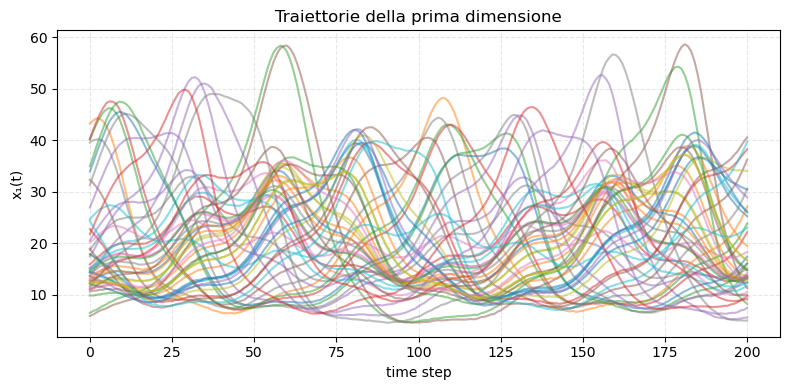

Dataset shape:  (201, 50, 3)
Functions set:  {'neg': 1, 'mul': 1, 'add': 1, 'sub': 1, 'sin': 1}
 
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.09      6.96454e+39       10            37990          54812.2      4.38m
   1     8.81      2.55856e+15        5          37406.6          61238.1      3.16m
   2     8.36      3.62108e+21       17          36324.9          45880.8      2.52m
 
promising programs:
mul(sub(neg(mul(sin(X2), neg(X1))), sub(3.418, X1)), sin(sub(0.116, X2)))
mul(sin(X2), sub(mul(sin(X2), sub(1.887, X1)), X1))
mul(sin(mul(neg(5.448), sin(X2))), sub(1.887, X1))
mul(mul(sin(sin(X2)), sin(sin(sin(neg(X2))))), sub(add(add(mul(sin(X1), sin(3.435)), sin(add(X1, X0))), sub(neg(neg(X1)), sin(add(X0, X1)))), mul(neg(X1), sin(X2))))
mul(sin(sin(sin(X2))), add(sin(mul(X2

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 10.296 1 + -0.945 X1 + -10.296 -1 + 0.945 X1 -1
(X1)' = 0.000
(X2)' = 0.500 1 + -0.500 -1
Model:
(X0)' = -7.698 1 + 1.062 X0 + 0.124 X2 + -0.098 X0 X1 + -0.085 -X1 + (-X2*sin(X2 - 0.1161992643977744) + sin(X0) + 0.9596421425916256)*sin(X2)**2*sin(X2*sin(sin(X2)))*sin(4.173100172066454*sin(X2) + 0.98115868449627781) - 4.810679563010094*sin(X1 - 1.8866550382739211)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
Model:
(X0)' = -7.844 1 + 1.061 X0 + 0.088 X1 + 0.130 X2 + -0.098 X0 X1 + 0.088 sin(X2*sin(sin(X2)))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.001 1
errors:  [3.871917268097246, 4.063819755811772, 1000, 3.871917268097246, 4.709311995102664, 1000, 1000, 4.82225469657542, 5.71430847125153, 4.711497805568696, 1000, 1000, 6.167193328417048, 1000, 1000, 1000, 1000, 1000, 3.9181995044706803, 4.705536635223068]

Best building block:
['sin(X2)']

smart-SINDy model:
(X0)' = -6.716 1 + 1.059 X0 + 0.079 X1 + 0.112 X2 + -0.097 X0 X1 + 0.388 sin(X2)
(X1)' = -1.497 X1 + 0.075 X0

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 1.027 X0 + -0.093 X0 X1
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = 3.443 1 + 1.068 X0 + 0.088 X1 + -0.084 X2 + -0.097 X0 X1 + 6.491 sin(X2*sin(sin(X2))) + -0.129 X2 sin(X2*sin(sin(X2)))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1.542232468563905, 1.445940266366273, 1.5243294536993817, 1.542232468563905, 1.445940266366273, 1.4766452242199843, 1.5243294536993817, 1.4576967686777116, 1.9791558144413455, 1.821753090003722, 1.5748144835377182, 1.4766452242199843, 2.3394897946541264, 27.549671442790853, 1000, 1.5231290844128713, 1000, 1000, 1.4061501544308272, 1.533405380167456]

Best building block:
['-X1 + (-X2*sin(X2 - 0.1161992643977744) + sin(X0) + 0.9596421425916256)*sin(X2)**2*sin(X2*sin(sin(X2)))*sin(4.173100172066454*sin(X2) + 0.98115868449627781) - 4.810679563010094*sin(X1 - 1.8866550382739211)']

smart-SINDy model:
(X0)' = 1.027 X0 + -0.093 X0 X1
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.01) and eliminated all coefficients
  warnings.warn(


Model complexity:  5
Lasso penalty:  3.692081317039384
RMSE:  0.8539792917527832

t: 60
Time:  60
CUSUM quantity:  0
CUSUM quantity:  0
Change point: False
Interval: [ 50 , 60 ]

Searching for the best building block:
Model:
(X0)' = 6.308 1 + 1.081 X0 + 0.093 X1 + -0.135 X2 + -0.097 X0 X1 + -10.464 sin(X2) + 0.193 X2 sin(X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.136 1 + 1.081 X0 + 0.098 X1 + -0.097 X0 X1
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = 6.676 1 + 1.081 X0 + 0.093 X1 + -0.142 X2 + -0.097 X0 X1 + 12.667 -sin(sin(X2)) + -0.233 X2 -sin(sin(X2))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = 6.308 1 + 1.081 X0 + 0.093 X1 + -0.135 X2 + -0.097 X0 X1 + 10.464 -sin(X2) + -0.193 X2 -sin(X2)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.136 1 + 1.081 X0 + 0.098 X1 + -0.097 X0 X1
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = 6.863 1 + 1.081 X0 + 0.092 X1 + -0.145 X2 + -0.097 X0 X1 + -14.2

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.07) and eliminated all coefficients
  warnings.warn(


Model:
(X0)' = 10.272 1 + -0.922 X1 + -10.272 -1 + 0.922 X1 -1
(X1)' = 0.000
(X2)' = 0.500 1 + -0.500 -1
Model:
(X0)' = -1.365 1 + 1.078 X0 + -0.097 X0 X1 + -0.085 -X1 + (-X2*sin(X2 - 0.1161992643977744) + sin(X0) + 0.9596421425916256)*sin(X2)**2*sin(X2*sin(sin(X2)))*sin(4.173100172066454*sin(X2) + 0.98115868449627781) - 4.810679563010094*sin(X1 - 1.8866550382739211)
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
Model:
(X0)' = -1.190 1 + 1.081 X0 + 0.097 X1 + -0.097 X0 X1 + -0.472 sin(X2*sin(sin(X2)))
(X1)' = -1.497 X1 + 0.075 X0 X1
(X2)' = 1.000 1
errors:  [1000, 1.1171520400905914, 1000, 1000, 1.1171520400905914, 1000, 1000, 1.0926276084249917, 1.0977757185375197, 1.1254539758842037, 1000, 1000, 0.9797350776714863, 19.69659843189914, 10.80913019537141, 1000, 14.349626193450604, 1000, 2.9472760947847725, 1.0673245615794769]

Best building block:
['sin(X1)']

smart-SINDy model:
(X0)' = -1.270 1 + 1.083 X0 + 0.105 X1 + -0.097 X0 X1 + -6.667 sin(X1) + 0.116 X2 sin(X1)
(X1)' = -1.497 X1

capi_return is NULL
Call-back cb_f_in_lsoda__user__routines failed.


KeyboardInterrupt: 

In [10]:
exp.H = 70
while exp.T <= exp.H:

    print(f't: {exp.T}')

    # update time-window:
    X_list_t = [x[(exp.T0*freq):(exp.T*freq)] for x in X_list]
    dX_list_t = [dx[(exp.T0*freq):(exp.T*freq)] for dx in dX_list]  

    exp.step_forward(SINDy_method, symbolic_SINDy_method, cusum, X_list_t, dX_list_t, param_list, feature_names, CP_threshold=0.8)

In [11]:
exp.patience

3